In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:27<00:00, 42.8MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.1MB/s]


In [ ]:
import zipfile
zipfile_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip",'r')
zipfile_ref.extractall("/content")
zipfile_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# normalize

def process(image, label):
  image = tf.cast(image/255.,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 86s 133ms/step - loss: 1.1347 - accuracy: 0.6148 - val_loss: 0.5998 - val_accuracy: 0.6818
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.5686 - accuracy: 0.7078 - val_loss: 0.5295 - val_accuracy: 0.7296
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4957 - accuracy: 0.7614 - val_loss: 0.5273 - val_accuracy: 0.7410
Epoch 4/10
625/625 [==============================] - 66s 104ms/step - loss: 0.4172 - accuracy: 0.8104 - val_loss: 0.4714 - val_accuracy: 0.7752
Epoch 5/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3532 - accuracy: 0.8482 - val_loss: 0.4899 - val_accuracy: 0.7982
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2688 - accuracy: 0.8870 - val_loss: 1.0334 - val_accuracy: 0.6580
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2055 - accuracy: 0.9183 - val_loss: 0.5583 - val_ac

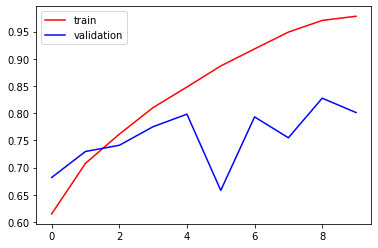

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dd.jpg')

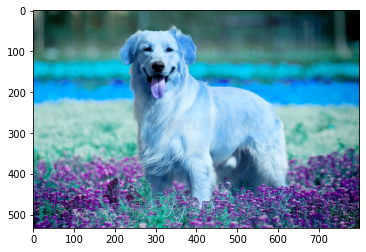

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape


(533, 800, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)

In [ ]:
test_pic = cv2.imread('/content/dogo.jpg')

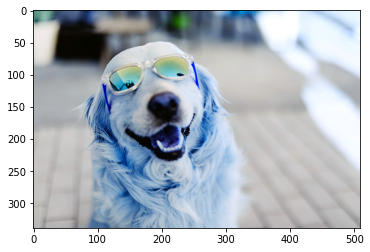

In [ ]:
plt.imshow(test_pic)

In [ ]:
test_pic = cv2.resize(test_pic,(256,256))

In [ ]:
test_put = test_pic.reshape((1,256,256,3))

In [ ]:
model.predict(test_put)

1/1 [==============================] - 0s 21ms/step


array([[0.]], dtype=float32)

In [ ]:
test_puc = cv2.imread('/content/dogo.jpg')

In [ ]:
test_puc = cv2.resize(test_puc,(256,256))

In [ ]:
test_pu = test_puc.reshape((1,256,256,3))

In [ ]:
model.predict(test_pu)

1/1 [==============================] - 0s 31ms/step


array([[0.]], dtype=float32)